In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Histograma

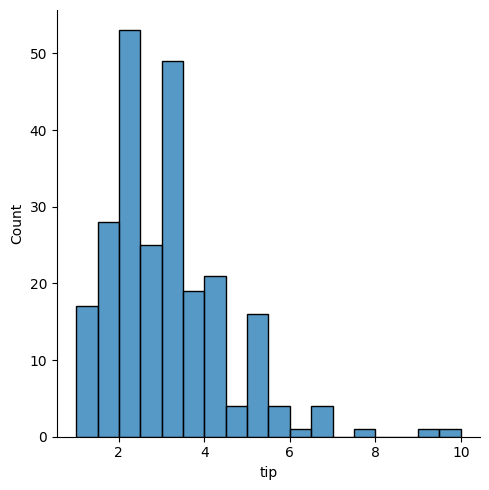

In [6]:
ax = sns.displot(tips_df.tip)

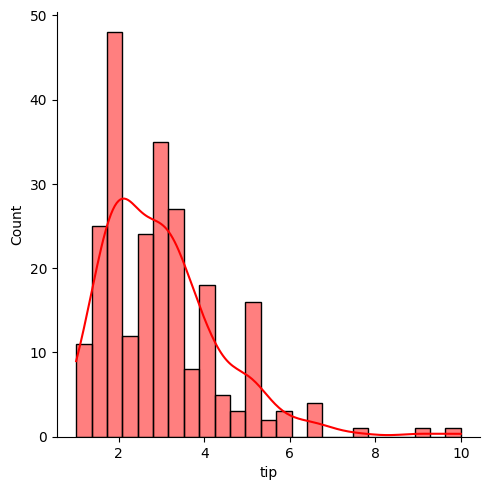

In [7]:
ax = sns.displot(tips_df.tip, kde=True, color='red', bins=25)

### Implementando Hue

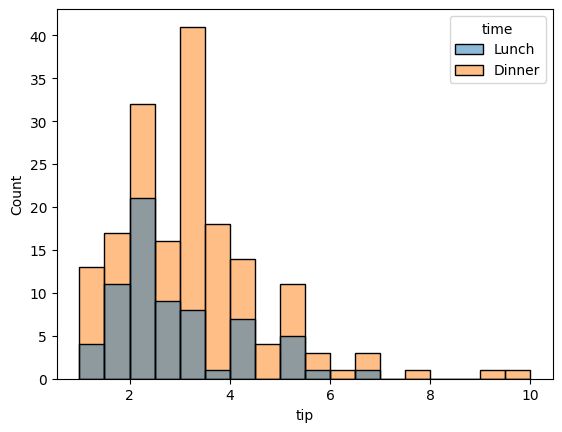

In [9]:
sns.histplot(tips_df, x='tip', kde=False, hue='time')
plt.show()

Podríamos querer los gráficos por separado

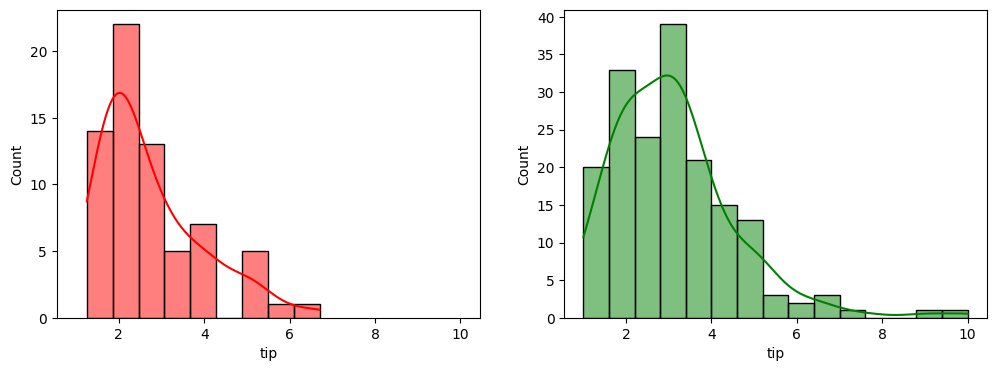

In [17]:
# Gráficos en 1 fila y 2 columnas
f, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
sns.histplot(tips_df[tips_df['time'] == 'Lunch'], x='tip', kde=True, color='red', label='Propinas en almuerzo', ax=axes[0])
sns.histplot(tips_df[tips_df['time'] == 'Dinner'], x='tip', kde=True, color='green', label='Propinas en cena', ax=axes[1])
plt.show()

### Gráfico de densidad

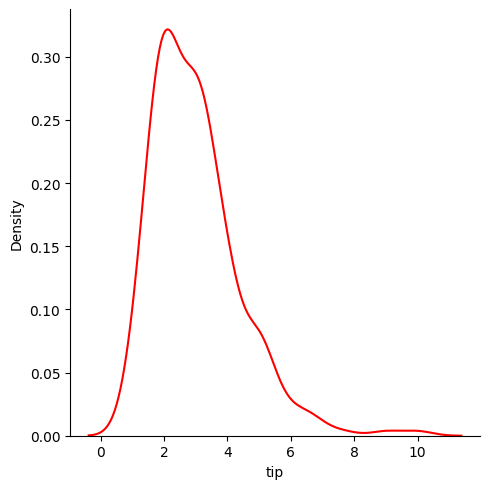

In [20]:
sns.displot(tips_df.tip, kind='kde', color='red')
plt.show()

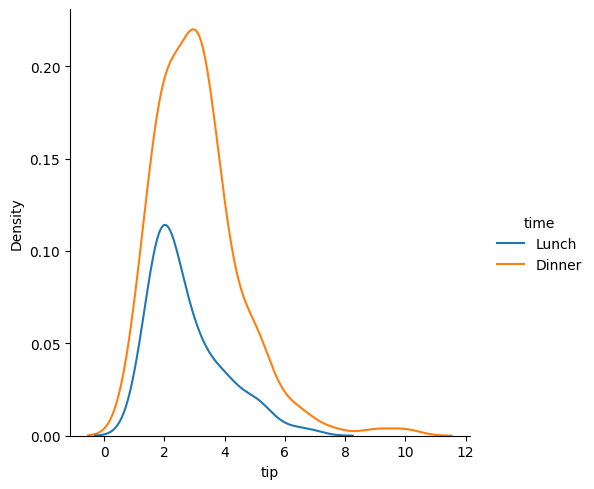

In [22]:
sns.displot(data=tips_df, x='tip', kind='kde', hue='time')
plt.show()

### Gráfico de cajas (Boxplot)

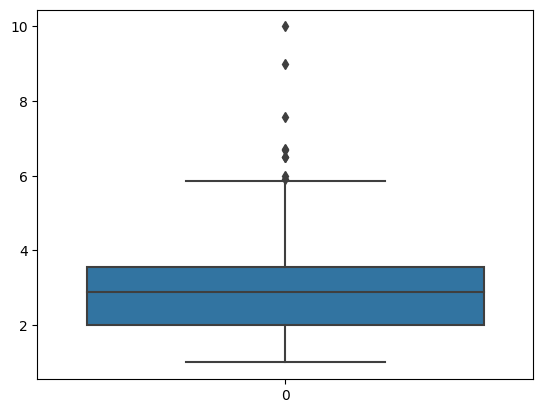

In [23]:
ax = sns.boxplot(tips_df.tip)

En horizontal

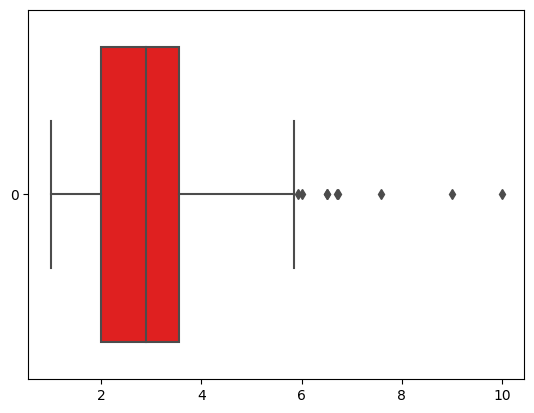

In [24]:
ax = sns.boxplot(tips_df.tip, orient='h', color='red')

Separando los datos

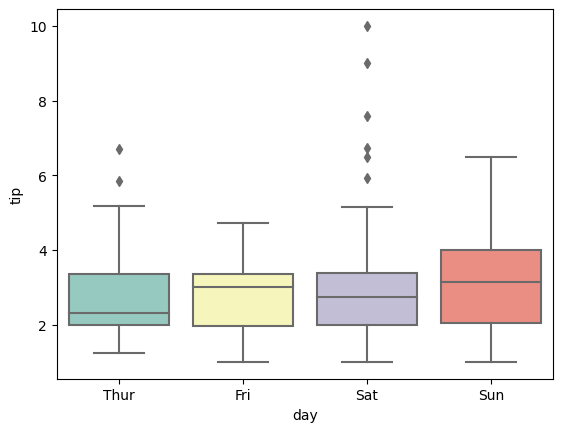

In [26]:
ax = sns.boxplot(data=tips_df, x='day', y='tip', palette='Set3')

### Gráfico de violín

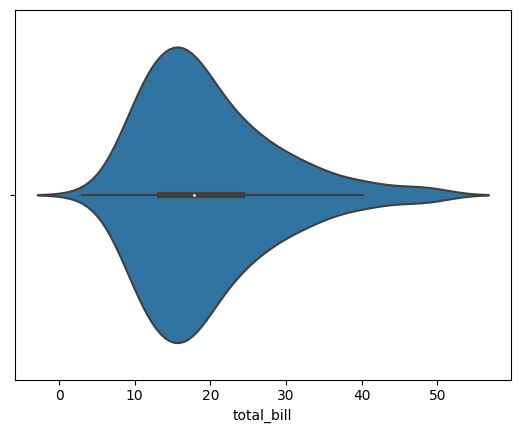

In [28]:
ax = sns.violinplot(x=tips_df.total_bill)

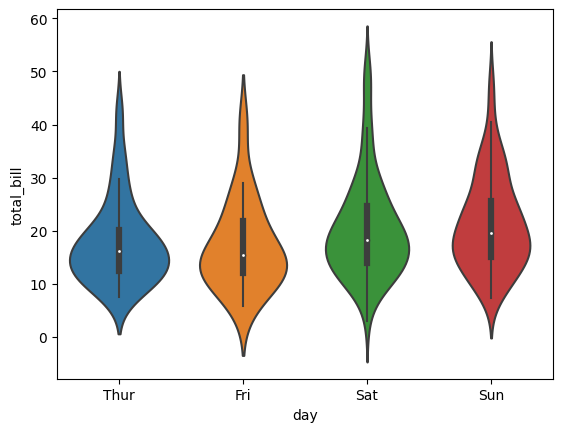

In [29]:
ax = sns.violinplot(data=tips_df, x='day', y='total_bill')

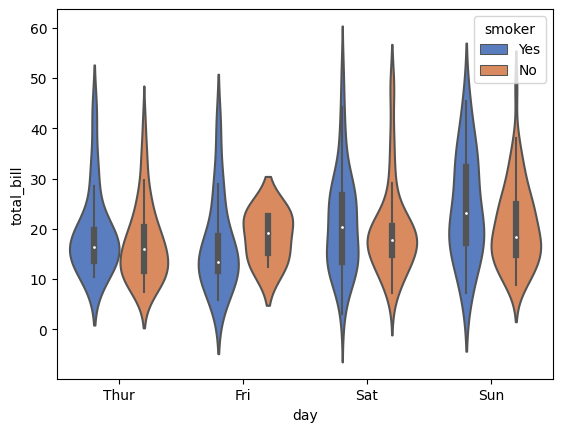

In [31]:
ax = sns.violinplot(data=tips_df, x='day', y='total_bill', hue='smoker', palette='muted')

### Gráfico de líneas paralelas

In [39]:
from pandas.plotting import parallel_coordinates
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
})
iris_df = iris_df.drop('Id', axis=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


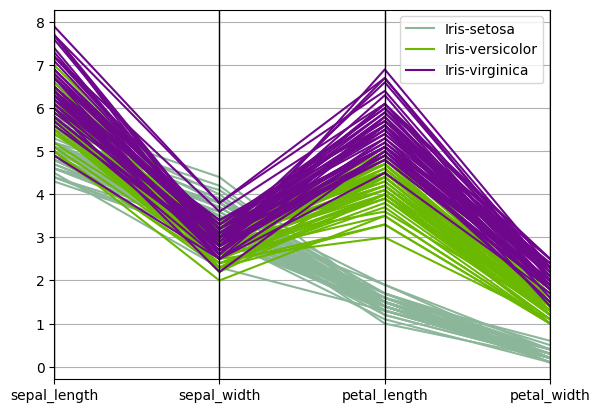

In [43]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
parallel_coordinates(iris_df[columns], 'species')
plt.show()

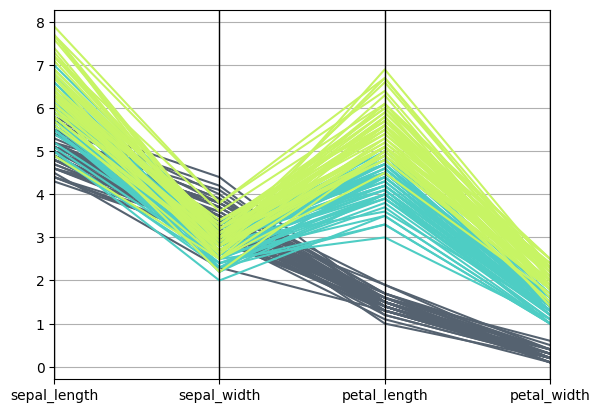

In [44]:
# Cambiar colores de líneas
ax = parallel_coordinates(iris_df[columns], 'species', color=['#556270', '#4ECDC4', '#C7F464'])

# Deshabilitar leyenda
ax.legend().set_visible(False)

plt.show()

### Gráfico radial

In [45]:
data = {
    'mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre'
            , 'Octubre', 'Noviembre', 'Diciembre'],
    'cosecha': [3, 1, 6, 6, 8, 10, 9, 7, 6, 8, 5, 3]
}

cosechas_df = pd.DataFrame(data)
cosechas_df

,mes,cosecha
0,Enero,3
1,Febrero,1
2,Marzo,6
3,Abril,6
4,Mayo,8
5,Junio,10
6,Julio,9
7,Agosto,7
8,Septiembre,6
9,Octubre,8


In [46]:
PI = 3.14

N = len(cosechas_df['cosecha'])

angulo_actual = 0

angulos = []

while angulo_actual < PI*2:

    angulos.append(angulo_actual)
    angulo_actual = angulo_actual + (PI*2)/N

angulos

[0,
 0.5233333333333333,
 1.0466666666666666,
 1.5699999999999998,
 2.0933333333333333,
 2.6166666666666667,
 3.14,
 3.6633333333333336,
 4.1866666666666665,
 4.71,
 5.233333333333333,
 5.756666666666667]

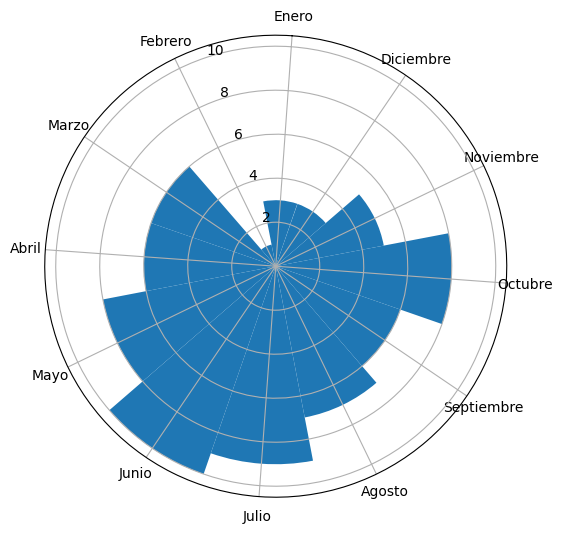

In [53]:
fig = plt.figure(figsize=(6,6))

plot = fig.add_subplot(polar=True)
plot.bar(angulos, cosechas_df.cosecha, width=2*PI/(N))

plot.set_theta_offset(1.5)
plot.set_theta_direction(1)

plot.xaxis.set_ticks(angulos)

plot.set_xticklabels(cosechas_df.mes)
plt.show()